# word2vec
参考URL:
https://qiita.com/9ryuuuuu/items/e4ee171079ffa4b87424

worddic= {'Hope': 0, 'to': 1, 'see': 2, 'you': 3, 'soon': 4, 'Nice': 5, 'again': 6}
[input] sentences_vec= [[0. 1. 2. 3. 4.]
 [5. 1. 2. 3. 6.]]
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_43 (Embedding)    (None, None, 2)           14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
[output] onehot_vec= [[[1. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]]

 [[0. 0. 0. 0. 0. 1. 0.]
  [0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]
[output] embedding_vec= [[[-0.03530975 -0.00357432]
  [-0.02751002 -0.01471115]
  [ 0.04857408  0.04991024]
  [ 0.00648881 -0.03362492]
  [ 0.04890269  0.0181414 ]]



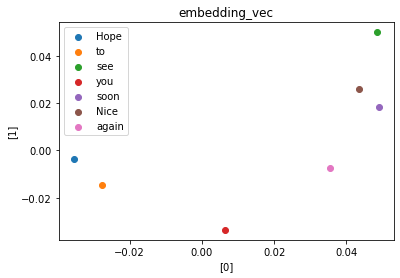

In [71]:
import numpy as np
from numpy.random import seed
from tensorflow import keras

# 辞書作成（単語―IDの対応表を作成）
def make_worddic(sencentes):
    worddic = {}
    for sentence in sentences:
        for word in sentence:
            if not word in worddic.keys():
                worddic[word] = len(worddic)
    return worddic

# 文章中の単語をID列に変換
def conv_sentences2vec(worddic, sentences):
    num_sentence = len(sentences)
    lenmax_sentence = 0
    for sentence in sentences:
        len_sentence = len(sentence)
        if len_sentence > lenmax_sentence:
            lenmax_sentence = len_sentence

    n_array = np.zeros((num_sentence,lenmax_sentence))
    for idx_s,sentence in enumerate(sentences):
        n_array[idx_s] = np.zeros(lenmax_sentence)
        for idx_w,word in enumerate(sentence):
            n_array[idx_s][idx_w] = worddic[word]

    return n_array

# OneHot Vector作成
def make_onehot(sentences_vec, dim):
    onehot_vec = np.zeros((sentences_vec.shape[0], sentences_vec.shape[1], dim))
    for idx_s,sentence_array in enumerate(sentences_vec):
        for idx_w, word in enumerate(sentence_array):
            onehot_vec[idx_s][idx_w][int(word)] = 1

    return onehot_vec

# 毎回の計算結果を同一にするための設定
seed(1)
tf.random.set_seed(2)

# ================
#  入力データ作成
# ================
# サンプル文章(2文)
sentences = [
    ['Hope', 'to', 'see', 'you', 'soon'],
    ['Nice', 'to', 'see', 'you', 'again']
]
worddic = make_worddic(sentences)
sentences_vec = conv_sentences2vec(worddic, sentences)
print("worddic=",worddic)
print("[input] sentences_vec=",sentences_vec)

vocab_size = len(worddic)
embed_size = 2

# ===================
#  OneHot Vector作成
# ===================
output_onehot_vec = make_onehot(sentences_vec, vocab_size)

# ===================
#  embedding表現作成
# ===================
embed_model = keras.Sequential()
embed_model.add(keras.layers.Embedding(vocab_size, embed_size))
embed_model.compile(optimizer='rmsprop', loss='mse')
embed_model.summary()
output_embedding_vec = embed_model.predict(sentences_vec)

# ===================
#  結果出力
# ===================
import matplotlib.pyplot as plt

print("[output] onehot_vec=",output_onehot_vec)
print("[output] embedding_vec=",output_embedding_vec)
print("[output] embed_model.get_weights()[0]=",embed_model.get_weights()[0])

plt.figure(facecolor="white")
plt.title("embedding_vec")
plt.xlabel("[0]")
plt.ylabel("[1]")
for word, embed_vec in zip(worddic.keys(), embed_model.get_weights()[0]):
    plt.scatter(embed_vec[0], embed_vec[1], label=word)

plt.legend(loc="upper left") 